# Part 1 - Loading Data
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import glob, os, sys, gc, subprocess
sys.path.insert(0, '../utils') # for import customed modules
from utils import conf_pyspark, print_filesize, load_dataset
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)

# for plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## 1 The Papers Past Dataset

In [2]:
# set path of raw data
path = r'../data/papers_past'

**Check total dataset directory size:**

In [3]:
print('Total size:', subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8'))

Total size: 33G


**Check dataset files path and size:**

In [4]:
files = glob.glob(path + '/*.txt')
files.sort()
print_filesize(files)

1 ../data/papers_past/Akaroa Mail and Banks Peninsula Advertiser.txt 198.2 MB
2 ../data/papers_past/Albertland Gazette.txt 266.6 KB
3 ../data/papers_past/Ashburton Guardian.txt 882.2 MB
4 ../data/papers_past/Auckland Star.txt 1.2 GB
5 ../data/papers_past/Bay Of Plenty Times.txt 403.4 MB
6 ../data/papers_past/Bruce Herald.txt 300.1 MB
7 ../data/papers_past/Bush Advocate.txt 178.4 MB
8 ../data/papers_past/Clutha Leader.txt 245.5 MB
9 ../data/papers_past/Colonist.txt 970.4 MB
10 ../data/papers_past/Daily Southern Cross.txt 796.9 MB
11 ../data/papers_past/Daily Telegraph.txt 456.1 MB
12 ../data/papers_past/Ellesmere Guardian.txt 342.0 MB
13 ../data/papers_past/Evening Post.txt 5.9 GB
14 ../data/papers_past/Fair Play.txt 3.0 MB
15 ../data/papers_past/Feilding Star.txt 823.5 MB
16 ../data/papers_past/Grey River Argus.txt 946.6 MB
17 ../data/papers_past/Hawera & Normanby Star.txt 1.3 GB
18 ../data/papers_past/Hawke's Bay Herald.txt 424.6 MB
19 ../data/papers_past/Hawke's Bay Weekly Times.txt 

**Check total samples/rows/documents of the dataset:**

In [5]:
# list of each file line number
lines = [sum(1 for line in open(f)) for f in files] 

print('Total sample number:', sum(lines))

Total sample number: 16731578


**Visualize the dataset based on the file/publisher:**

In [6]:
# list of each file name
names = [os.path.splitext(os.path.basename(f))[0] for f in files] 
# dictionary of each file path and line number
info = dict(zip(names, lines)) 

# transform dict of dataset files to dataframe for statistic and ploting.
df_info = pd.DataFrame.from_dict(info, orient='index').reset_index()
df_info.columns = ['publisher', 'lines']
df_info = df_info.sort_values('lines', ascending=False).reset_index(drop=True)
df_info.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
publisher,Evening Post,Hawera & Normanby Star,Wanganui Chronicle,Otago Daily Times,Marlborough Express,Auckland Star,Poverty Bay Herald,Colonist,Ashburton Guardian,Grey River Argus,Thames Star,Feilding Star,Star,Wanganui Herald,Wairarapa Daily Times,Nelson Evening Mail,Otago Witness,Taranaki Herald,West Coast Times,Northern Advocate,North Otago Times,Bay Of Plenty Times,Daily Telegraph,Hawke's Bay Herald,Daily Southern Cross,Southland Times,Timaru Herald,Ellesmere Guardian,NZ Truth,Ohinemuri Gazette,Bruce Herald,Tuapeka Times,Observer,Bush Advocate,Mataura Ensign,Akaroa Mail and Banks Peninsula Advertiser,Clutha Leader,New Zealand Tablet,Manawatu Standard,Wellington Independent,"Rodney and Otamatea Times, Waitemata and Kaipara Gazette",Inangahua Times,Waikato Times,Manawatu Herald,Taranaki Daily News,Nelson Examiner and New Zealand Chronicle,Manawatu Times,Otautau Standard and Wallace County Chronicle,Lyttelton_Times,Te Aroha News,Hutt News,Kaipara and Waitemata Echo,New Zealand Spectator and Cook's Strait Guardian,New Zealand Free Lance,Waiapu Church Gazette,Oxford Observer,New Zealander,New Zealand Gazette and Wellington Spectator,Waimate Daily Advertiser,New Zealand Illustrated Magazine,Progress,Hawke's Bay Weekly Times,New Zealand Colonist and Port Nicholson Advertiser,Kai Tiaki,Fair Play,Waiapu Church Times,New Zealand Advertiser and Bay of Islands Gazette,Albertland Gazette
lines,3007465,807068,804226,747706,711069,674134,643505,638055,603346,574017,562647,467377,431855,420421,375253,343312,329016,328784,314293,290601,283063,246233,217769,216671,215102,211876,205144,182751,135108,133499,120432,116973,116157,101273,98941,96608,88108,79804,79269,76112,75831,70689,61250,59989,59712,51238,43499,40199,28911,26683,16138,15809,14283,14232,13733,9908,9886,5400,5037,4201,3216,1690,1650,1630,1180,245,184,112


Text(0.5, 0, 'File/Publisher')

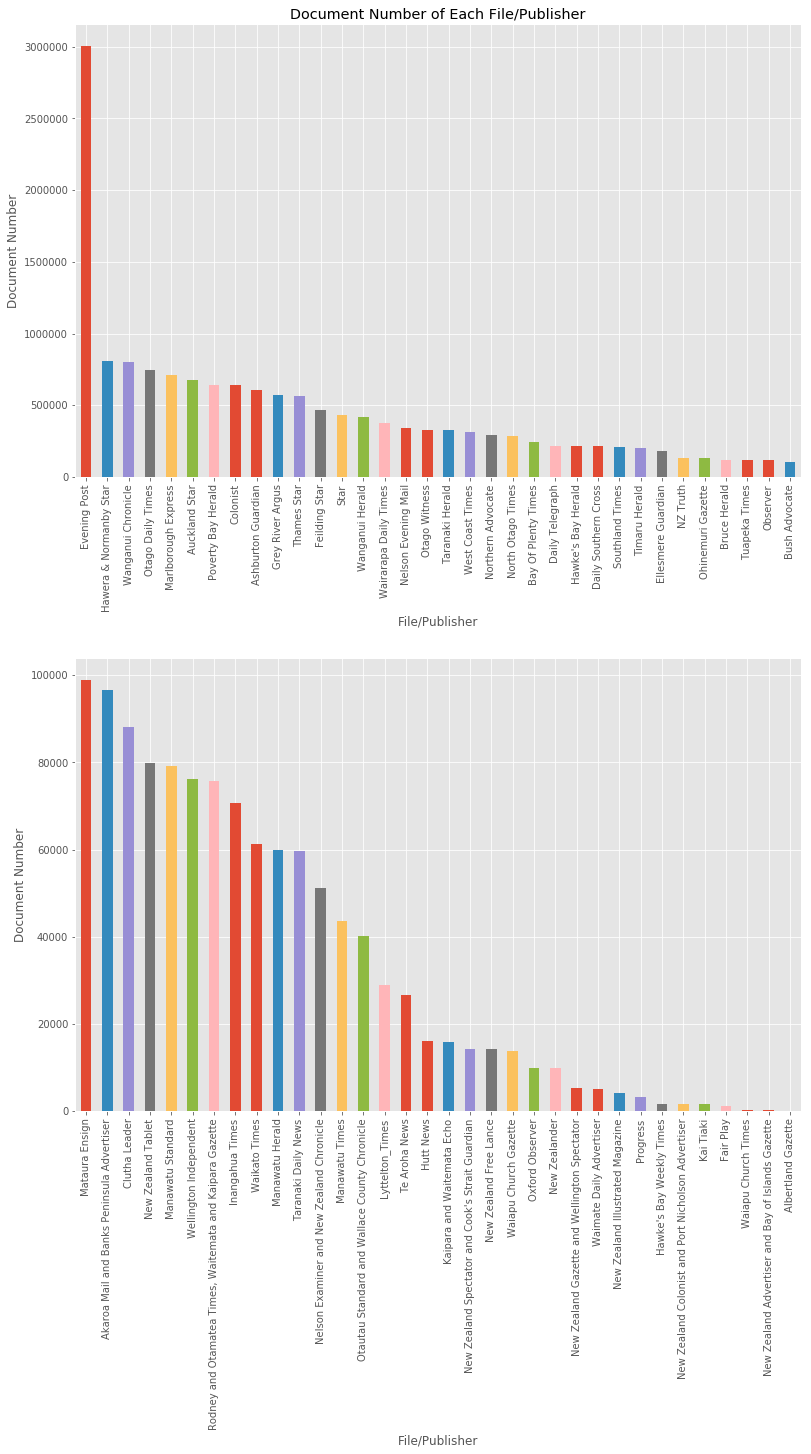

In [7]:
# index of half dataframe, split dataframe to plot better
i = int(df_info.shape[0]/2)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 20))
fig.subplots_adjust(hspace=0.4)
df_info.iloc[:i].plot(ax=axes[0], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
df_info.iloc[i:].plot(ax=axes[1], 
                      kind='bar', 
                      x='publisher', 
                      y='lines', 
                      legend=False)
axes[0].set_title('Document Number of Each File/Publisher')
axes[0].set_ylabel('Document Number')
axes[0].set_xlabel('File/Publisher')
axes[1].set_ylabel('Document Number')
axes[1].set_xlabel('File/Publisher')

**The Papers Past dataset has:**
* total **33** GB,
* total **68** files/publishers, 
* total **16,731,578** lines/samples/rows/documents, 
* each file contains lines from 3,007,465 (Evening Post) to 112 (Albertland Gazette).

## 2 Loading Dataset With PySpark

**For 33 GB dataset, we chose using PySpark as our data process plateform.**

In [8]:
# intiate PySpark
sc, spark = conf_pyspark()

sc

[('spark.driver.host', 'x99.hub'),
 ('spark.app.name', 'local'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.memory', '62g'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1548143703244'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.port', '37527'),
 ('spark.driver.maxResultSize', '4g'),
 ('spark.driver.cores', '6')]


<SparkContext master=local[*] appName=local>

**Load dataset:**

In [9]:
df = load_dataset('papers_past', spark)

**Print random rows of the loaded dataframe, and check row number of the loaded dataframe:**

In [10]:
print('Shape of dataframe: ({}, {})'.format(df.count(), len(df.columns)))
df.sample(False, 0.00001).limit(20).toPandas().head(20)

Shape of dataframe: (16731578, 6)


,id,url,publisher,time,title,content
0,2627595,http://api.digitalnz.org/records/2627595/source,Mataura Ensign,1887-03-04T00:00:00.000Z,"A Great Sleep. (Mataura Ensign, 04 March 1887)",A Great Sleep.He was stretched upon his bed ; his face was violet; rather than red ; his eyes were swelled ; his mou...
1,28963816,http://api.digitalnz.org/records/28963816/source,Daily Telegraph,1885-03-21T00:00:00.000Z,"NOTABILIA. (Daily Telegraph, 21 March 1885)","NOTABILIA.""Fun on tho Bristol"" this evening at the Theatre Royal. Tenders close at noon on Monday for tho supply and..."
2,29023407,http://api.digitalnz.org/records/29023407/source,Daily Telegraph,1889-12-13T00:00:00.000Z,"THE DUPLICATE CABLE. (Daily Telegraph, 13 December 1889)","THE DUPLICATE CABLE.Wellington, This day. The acting Premier intends wiring to the Postmaster-General of New South W..."
3,29118829,http://api.digitalnz.org/records/29118829/source,Daily Telegraph,1896-02-01T00:00:00.000Z,"DEATH. (Daily Telegraph, 01 February 1896)","DEATH.Moody.—Jit Fspier, on January 31st, 1596, Ethel Maud, youngest child of Thomas and Mary .enn Moody, aeed 12 mo..."
4,29199844,http://api.digitalnz.org/records/29199844/source,Daily Telegraph,1900-07-19T00:00:00.000Z,"WOMEN'S DISABILITIES. (Daily Telegraph, 19 July 1900)","WOMEN'S DISABILITIES.A Couple of HoursfFun.Mr ""Riccarton"" Russell'sBantling Killed.(FROM OUR PARLIAMENTARYRtl'UaiMti..."
5,2395037,http://api.digitalnz.org/records/2395037/source,Bay Of Plenty Times,1884-05-29T00:00:00.000Z,"WELLINGTON. (Bay Of Plenty Times, 29 May 1884)","WELLINGTON.Wednesday,The Governor has decided not to interfere with the sentence of death passed on O'Donoghan for m..."
6,8322792,http://api.digitalnz.org/records/8322792/source,Bay Of Plenty Times,1909-07-05T00:00:00.000Z,"CABLE NEWS. (Bay Of Plenty Times, 05 July 1909)",CABLE NEWS.KIO'HT IlOftlS IN MINKS. LONDON. Juim Ui>. '.Hie.Klght Hours in Jlim*s Act will come into luitu in ihe Mi...
7,2328843,http://api.digitalnz.org/records/2328843/source,Bay Of Plenty Times,1883-06-23T00:00:00.000Z,"Page 3 Advertisements Column 3 (Bay Of Plenty Times, 23 June 1883)","b'To Guilders. rpENDERS will bo received at my A Office until 12 noon on Monday, July 9th, for the Erection of a Hot..."
8,11986821,http://api.digitalnz.org/records/11986821/source,North Otago Times,1895-08-30T00:00:00.000Z,"INTERPROVINCIAL . (BY TELEGRAPH.) AUCKLAND. August 28. (North Otago Times, 30 August 1895)",INTERPROVINCIAL . (BY TELEGRAPH.) AUCKLAND. August 28.The goldfields revenue collected by the Wardens Court at Paero...
9,8477828,http://api.digitalnz.org/records/8477828/source,North Otago Times,1884-01-26T00:00:00.000Z,"Page 3 Advertisements Column 2 (North Otago Times, 26 January 1884)","E W. H. S. Roberts. THIS DAY. '"" SATUEDAY, 26th JANUARY. n '"" At his Roomi, Tyne street. !i At 12 o'clock. )T>ETER W..."


---

In [11]:
sc.stop()
gc.collect()

75